In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(100)  # Different seed for uniqueness

# Create input values
x_values = np.random.uniform(0, 5, 200)
epsilon = np.random.normal(0, 1, 200)

# True model
y_values = 3 + 4 * x_values + epsilon

# Add bias term manually
X_matrix = np.column_stack((np.ones(len(x_values)), x_values))

print("Data generated.")


Data generated.


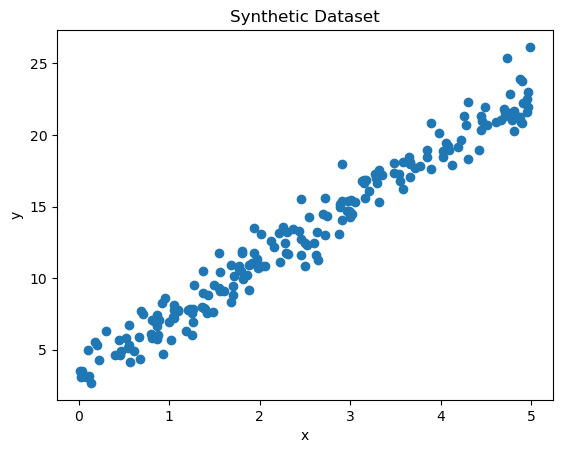

In [3]:
plt.figure()
plt.scatter(x_values, y_values)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Dataset")
plt.show()


In [4]:
# Using dot() instead of @
theta_normal = np.dot(np.linalg.inv(np.dot(X_matrix.T, X_matrix)), 
                      np.dot(X_matrix.T, y_values))

print("Normal Equation Results:")
print("Intercept:", theta_normal[0])
print("Slope:", theta_normal[1])


Normal Equation Results:
Intercept: 3.3520035778709527
Slope: 3.9201409598497836


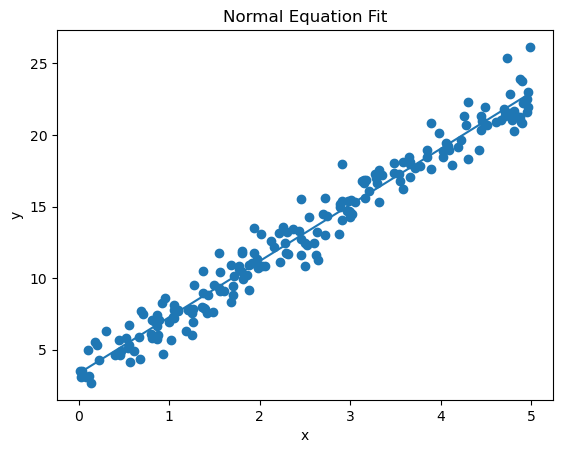

In [5]:
# Sort x for smooth plotting
sorted_indices = np.argsort(x_values)
x_sorted = x_values[sorted_indices]
X_sorted = X_matrix[sorted_indices]

plt.figure()
plt.scatter(x_values, y_values)
plt.plot(x_sorted, np.dot(X_sorted, theta_normal))
plt.title("Normal Equation Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [6]:
def gradient_descent(X, y, lr=0.05, epochs=1000):
    theta = np.zeros(X.shape[1])
    n = len(y)
    history = []

    for _ in range(epochs):
        predictions = np.dot(X, theta)
        residuals = predictions - y
        cost = np.mean(residuals ** 2)
        history.append(cost)

        gradient = (2/n) * np.dot(X.T, residuals)
        theta = theta - lr * gradient

    return theta, history


In [7]:
theta_gd, mse_history = gradient_descent(X_matrix, y_values)

print("Gradient Descent Results:")
print("Intercept:", theta_gd[0])
print("Slope:", theta_gd[1])


Gradient Descent Results:
Intercept: 3.3520035777489796
Slope: 3.920140959887559


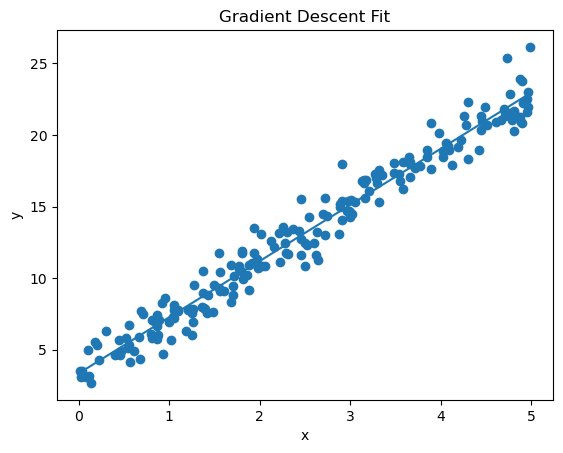

In [8]:
plt.figure()
plt.scatter(x_values, y_values)
plt.plot(x_sorted, np.dot(X_sorted, theta_gd))
plt.title("Gradient Descent Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


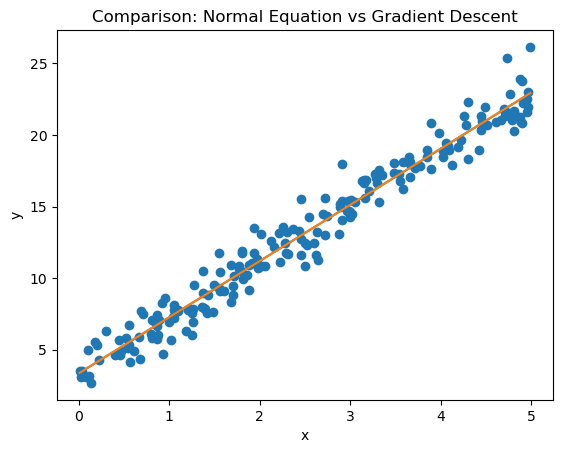

In [9]:
plt.figure()
plt.scatter(x_values, y_values)
plt.plot(x_sorted, np.dot(X_sorted, theta_normal))
plt.plot(x_sorted, np.dot(X_sorted, theta_gd))
plt.title("Comparison: Normal Equation vs Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


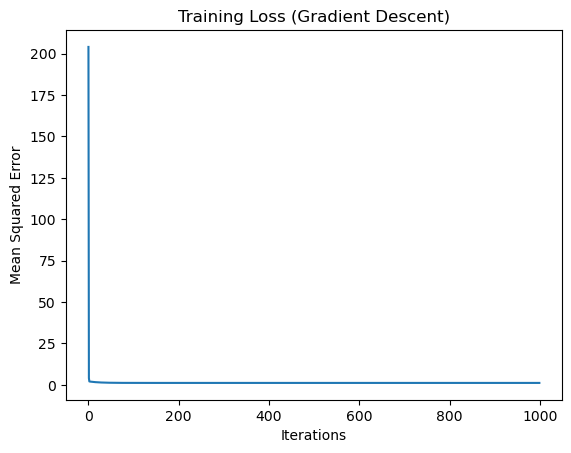

In [10]:
plt.figure()
plt.plot(mse_history)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss (Gradient Descent)")
plt.show()
